 DATASET : 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   


 FEATURES : 
 [[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462  

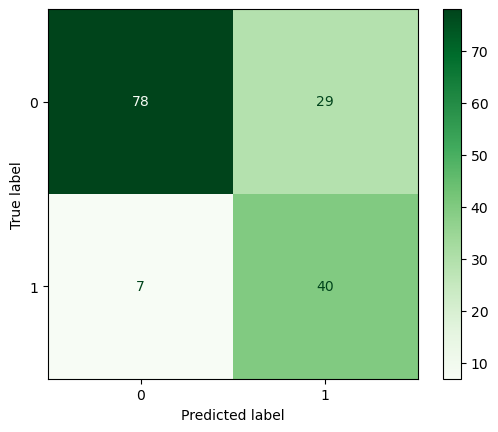

In [11]:

# TASK DESCRIPTION: implementing and testing a perceptron model to predict diabetes using the Pima Indians Diabetes dataset. 
# [ submission consist of a conference-style paper and the python code upload within GitHub ]


# importing required library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# reading the dataset
data = pd.read_csv('diabetes.csv')

# displaying first 5 rows of the dataset
print("\033[1;36m DATASET : \033[0m\n", data.head(5), "\n\n")


# extracting features and labels from the dataset
x = data.drop('Outcome', axis = 1).values
y = data['Outcome'].values

# feature scaling using MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# displaying the features 'x'
print("\033[1;36m FEATURES : \033[0m\n", x, "\n\n")

# displaying the labels 'y'
print("\033[1;36m LABELS : \033[0m\n", y, "\n\n")


# adding bias to features 'x'
x = np.hstack((np.ones((x.shape[0], 1)), x))

# displaying the added bias features 'x'
print("\033[1;36m CONVERTED FEATURES : \033[0m\n", x, "\n\n")


# converting data labels 'y' from {0, 1} to {-1, 1} 
y = np.where(y == 0, -1, 1)

# displaying the converted labels 'y'
print("\033[1;36m CONVERTED LABELS : \033[0m\n", y, "\n\n")


# splitting the dataset : assigning 80% for training set and 20% for testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


# assigning number of iterations 'T' and learning rate(η) 'eta' 
T = 1000
eta = 0.01


# initializing weight vector 'w' to zero
w = np.zeros(x_train.shape[1])


# training function for perceptron
def train(x, y, w, eta, T):
    for t in range(T):
        for i in range(len(x)):
            if y[i] * np.dot(x[i], w) <= 0:
                # updating weight vector as per formula
                w = w + eta * y[i] * x[i]
    return w


# training data model using the training set
w_trained = train(x_train, y_train, w, eta, T)
                  
# displaying trained weight vector 'w_trained'
print("\033[1;36m TRAINED WEIGHT VECTOR : \033[0m\n", w_trained, "\n\n")


# prediction function for perceptron
def predict(x, w):
    return np.sign(np.dot(x, w))


# making predictions on the testing set
y_predicted = predict(x_test, w_trained)
                  
# converting predictions from {-1, 1} back to {0, 1} for evaluating the results
y_predicted = np.where(y_predicted == -1, 0, 1)
                  
# displaying the predictions made 'y_predicted'
print("\033[1;36m PREDICTTIONS ON TEST DATA : \033[0m\n", y_predicted, "\n\n")


# calculating the accuracy on testing set 
accuracy = accuracy_score(np.where(y_test == -1, 0, 1), y_predicted)
                  
# displaying the accuracy on testing set
print("\033[1;36m ACCURACY ON TEST DATA : \033[0m", round(accuracy * 100, 3), "%\n\n")

# calculating the precision on testing set 
precision = precision_score(np.where(y_test == -1, 0, 1), y_predicted)

# displaying the precision on testing set
print("\033[1;36m PRECISION ON TEST DATA : \033[0m", round(precision * 100, 3), "%\n\n")

# calculating the recall on testing set 
recall = recall_score(np.where(y_test == -1, 0, 1), y_predicted)

# displaying the recall on testing set
print("\033[1;36m RECALL ON TEST DATA : \033[0m", round(recall * 100, 3), "%\n\n")

# calculating the F1-Score on testing set 
f1 = f1_score(np.where(y_test == -1, 0, 1), y_predicted)

# displaying the F1-Score on testing set
print("\033[1;36m F1-SCORE ON TEST DATA : \033[0m", round(f1 * 100, 3), "%\n\n")


# calculating the confusion matrix for testing set
c_matrix = confusion_matrix(np.where(y_test == -1, 0, 1), y_predicted)

# displaying the generated confusion matrix 'c_matrix' as a plot 
print("\033[1;36m PLOT OF CONFUSION MATRIX : \033[0m\n")
ConfusionMatrixDisplay(confusion_matrix=c_matrix).plot(cmap='Greens')
plt.show()
